# Analyse the Raw Visual Attention Metrics

In [ ]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['savefig.facecolor'] = 'white'

## Load the data

In [ ]:
def click_data_to_list(click_data_string):
    click_data_list = []
    for click in click_data_string.split(" "):
        click = click.split("-")
        # extract the x and y coordinates from a string via regex
        x = int(re.search(r'\d+', click[0])[0])
        y = int(re.search(r'\d+', click[1])[0])
        click_data_list.append((x, y))
    return click_data_list  #


def time_data_to_list(time_data_string):
    time_data_list = []
    for time in time_data_string.split(" "):
        time_data_list.append(float(time) / 1000)
    return time_data_list

In [ ]:
# check if result folder exists
if not os.path.exists("./results"):
    os.mkdir("./results")

In [ ]:
df = pd.read_csv('./data/preprocessed_experiment_data.csv')
df = df[df["Outlier"] == False]
df = df.drop(columns=["Outlier"])

df["ClickData"] = df["ClickData"].apply(lambda x: click_data_to_list(x))
df["TimeData"] = df["TimeData"].apply(lambda x: time_data_to_list(x))
df["NumberOfClicks"] = df["ClickData"].apply(lambda x: len(x))
df["AverageTimeOfClicks"] = (df["ResponseTime"] / 1000) / df["NumberOfClicks"]

## Descriptive: Number Of Clicks per Algorithm

In [ ]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
df_tmp = df_visual[["Algorithm", "ProgrammingStyle", "NumberOfClicks"]].groupby(
    ["Algorithm", "ProgrammingStyle"]).describe()
df_tmp.to_csv("./results/visual_attention_number_of_clicks_per_algorithm.csv")
df_tmp

In [ ]:
df_tmp = df_visual[["ProgrammingStyle", "Algorithm", "NumberOfClicks"]]
df_tmp = df_tmp[df_tmp["Algorithm"] != "total"]
ax = sns.violinplot(x="ProgrammingStyle", y="NumberOfClicks", data=df_tmp,
                    hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.set(ylim=(0.0, 100.0))
plt.savefig("./results/visual_attention_number_of_clicks_per_style_violin.png")
plt.show()
plt.close('all')

In [ ]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
ax = sns.catplot(x="Algorithm", y="NumberOfClicks", hue="ProgrammingStyle", data=df_visual, kind="bar", height=5,
                 aspect=5, hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.tight_layout()
ax.set(ylabel='Number Of Clicks per Algorithm')
plt.savefig("./results/visual_attention_number_of_clicks_per_algorithm.png")
plt.show()
plt.close('all')

## Descriptive: Get Average Time of Clicks per Algorithm

In [42]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
df_tmp = df_visual[["Algorithm", "ProgrammingStyle", "AverageTimeOfClicks"]].groupby(
    ["Algorithm", "ProgrammingStyle"]).describe()
df_tmp.to_csv("./results/visual_attention_average_time_of_clicks_per_algorithm.csv")
df_tmp

AverageTimeOfClicks                        \
                                               count       mean        std   
Algorithm     ProgrammingStyle                                               
LinkedList    higher-order                       5.0   3.870583   4.786513   
              iterative                          6.0   1.322143   0.315762   
              list-comprehension                 7.0   1.666785   0.665028   
              recursive                          6.0   2.871412   3.427894   
apply         higher-order                       8.0   3.044512   2.517295   
              iterative                          7.0   5.693800   6.896022   
              list-comprehension                 6.0  15.986319  26.145068   
              recursive                          7.0   2.278829   1.593352   
computer      higher-order                       7.0   2.481384   1.274106   
              iterative                          5.0   2.561939   1.110463   
              list-comprehension                 8.0   1.847289   0.584720   
              recursive                          4.0   6.992149   9.903901   
condition_sum higher-order                       6.0  19.009406  27.818300   
              iterative                          7.0   2.245018   0.716550   
              list-comprehension                 7.0   4.055946   1.762658   
              recursive                          6.0   2.582092   0.875142   
find          higher-order                       5.0   8.156059   7.688899   
              iterative                          7.0   2.245674   1.269006   
              list-comprehension                 6.0   4.746681   2.964698   
              recursive                          6.0   2.460136   2.023651   
is_prime      higher-order                       7.0   5.863747   6.851100   
              iterative                          9.0   2.895691   2.410473   
              list-comprehension                 5.0   2.037000   0.938687   
              recursive                          7.0   3.097253   2.870054   
max           higher-order                       8.0   3.377257   2.118235   
              iterative                          6.0   2.977039   2.396996   
              list-comprehension                 7.0   2.854884   1.355707   
              recursive                          7.0   3.875878   4.335688   
node          higher-order                       7.0   1.714489   0.472124   
              iterative                          7.0   1.694089   0.846538   
              list-comprehension                 5.0   2.575038   1.994722   
              recursive                          5.0   2.018593   0.974096   
prime_factors higher-order                       7.0   5.027794   3.789875   
              iterative                          6.0   3.045216   3.042379   
              list-comprehension                 6.0  11.336141  20.253148   
              recursive                          6.0   2.865086   0.921142   
quad_mul      higher-order                       5.0   5.589538   6.248374   
              iterative                          8.0   3.340192   2.945449   
              list-comprehension                 6.0   4.506165   3.229365   
              recursive                          6.0   4.022583   3.245806   
store         higher-order                       4.0   2.185366   1.759323   
              iterative                          6.0   3.878688   6.081055   
              list-comprehension                 6.0   1.476232   0.516884   
              recursive                          6.0   1.391671   0.135009   
total         higher-order                      69.0   5.331375   9.590110   
              iterative                         74.0   2.920014   3.244970   
              list-comprehension                69.0   4.727406  10.091997   
              recursive                         66.0   3.030048   3.323463   

                                                      

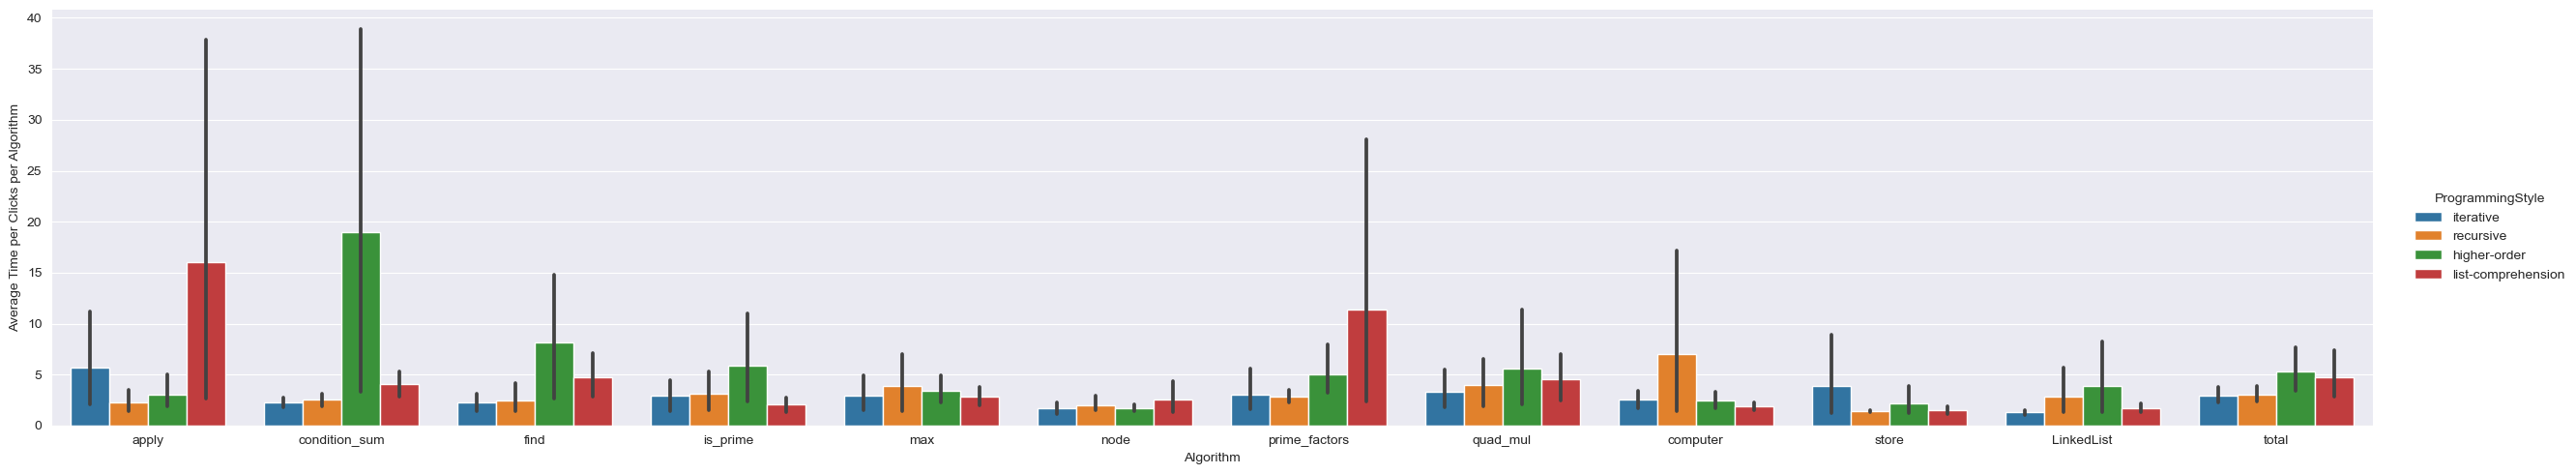

In [43]:
df_tmp = df.copy()
df_tmp["Algorithm"] = "total"
df_visual = df.append(df_tmp)
ax = sns.catplot(x="Algorithm", y="AverageTimeOfClicks", hue="ProgrammingStyle", data=df_visual, kind="bar", height=5,
                 aspect=5, hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.tight_layout()
ax.set(ylabel='Average Time per Clicks per Algorithm')
plt.savefig("./results/visual_attention_average_time_of_clicks_per_algorithm.png")
plt.show()
plt.close('all')

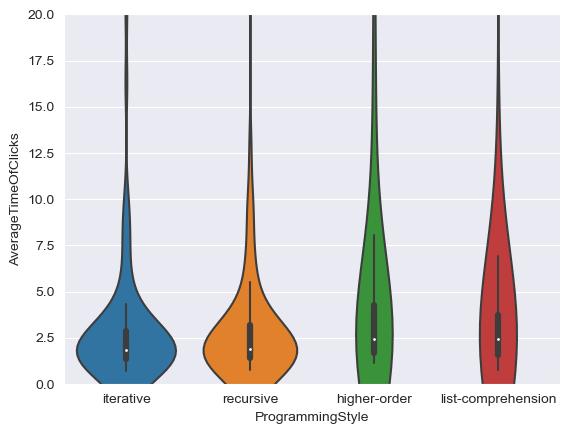

In [44]:
df_tmp = df_visual[["ProgrammingStyle", "Algorithm", "AverageTimeOfClicks"]]
df_tmp = df_tmp[df_tmp["Algorithm"] != "total"]
ax = sns.violinplot(x="ProgrammingStyle", y="AverageTimeOfClicks", data=df_tmp,
                    hue_order=["iterative", "recursive", "higher-order", "list-comprehension"])
ax.set(ylim=(0.0, 20.0))
plt.savefig("./results/visual_attention_average_time_of_clicks_per_style_violin.png")
plt.show()
plt.close('all')